In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image

from scipy import sparse
import scipy.stats as ss
import textblob
import xgboost

from textblob import TextBlob
from nltk.stem import PorterStemmer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import LatentDirichletAllocation

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import gensim
from gensim import corpora

In [78]:
# donloading required NLTK resource

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kshitiz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kshitiz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [79]:
# Loading dataset

df=pd.read_excel('.\Womens Clothing Reviews Data.xlsx')
df.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      23486 non-null  int64 
 1   Category        23472 non-null  object
 2   Subcategory1    23472 non-null  object
 3   SubCategory2    23472 non-null  object
 4   Location        23486 non-null  object
 5   Channel         23486 non-null  object
 6   Customer Age    23486 non-null  int64 
 7   Review Title    19676 non-null  object
 8   Review Text     22641 non-null  object
 9   Rating          23486 non-null  int64 
 10  Recommend Flag  23486 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.0+ MB


In [81]:
# if any null values are present and in which column

df.isnull().sum()

Product ID           0
Category            14
Subcategory1        14
SubCategory2        14
Location             0
Channel              0
Customer Age         0
Review Title      3810
Review Text        845
Rating               0
Recommend Flag       0
dtype: int64

In [82]:
# dropping null values 

df.dropna(inplace=True)

In [83]:
df.isnull().sum()

Product ID        0
Category          0
Subcategory1      0
SubCategory2      0
Location          0
Channel           0
Customer Age      0
Review Title      0
Review Text       0
Rating            0
Recommend Flag    0
dtype: int64

### EDA

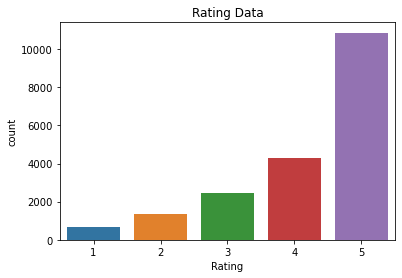

In [84]:
# Rating data 

sns.countplot(data=df,x='Rating')
plt.title('Rating Data')
plt.show()

In [85]:
print(type(plt.title))


<class 'function'>


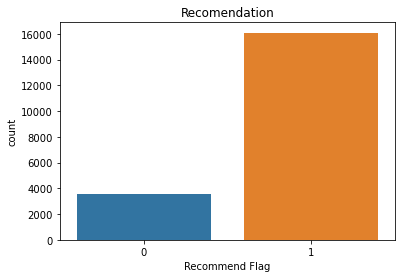

In [86]:
# Recommendation data - 0 mean No and 1 means yes

sns.countplot(data=df,x='Recommend Flag')
plt.title('Recomendation')
plt.show()

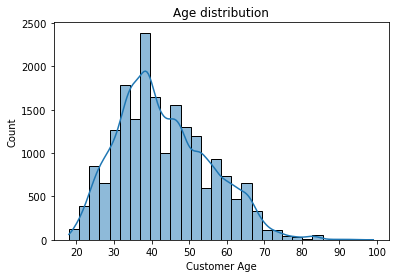

In [87]:
# age group distribution

sns.histplot(df['Customer Age'],kde=True,bins=30)
plt.title('Age distribution')
plt.show()

#### Sentiment Analysis

In [88]:
df['sentiment_score']=df['Review Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df.head(2)

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag,sentiment_score
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0.073675
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0.550000


In [89]:
df=df.drop(columns=['Product ID'])
df['Sentiment']=df['sentiment_score'].apply(lambda x: 'positive' if x>0 else ('Negative' if x<0 else 'Neutral'))

In [90]:
df.head(2)

,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag,sentiment_score,Sentiment
2,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0.073675,positive
3,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0.550000,positive


In [91]:
pd.crosstab(df.Rating,df.Sentiment)

Sentiment,Negative,Neutral,positive
Rating,,,
1,204,9,478
2,261,13,1086
3,281,12,2171
4,191,22,4076
5,203,23,10632


In [92]:
negative_score=df[((df.Sentiment=='Negative')&(df.Rating>=4))]

In [93]:
negative_score['Review Text']

44       Tried this on today at my local retailer and h...
72       I have a short torso and this works well for m...
180      Loved the green color, the cut is super flatte...
215      Ranna designs richly detailed dresses and this...
235      The blush stripes are subtle but they definite...
                               ...                        
23156    I did not intend on buying this dress, as i ha...
23163    The material is a medium weight jersey knit th...
23253    I've worn this dress to work with a black cors...
23323    I just got this shirt the other day at the sto...
23414    The front and back materials differ. the back ...
Name: Review Text, Length: 394, dtype: object

### Text Mining

In [94]:
# word cloud based on + and - reviews

positive_review=df['Review Text'][df.Rating>=4]
negative_review=df['Review Text'][df.Rating<4]

In [123]:
stop_word=set(stopwords.words('english'))

import string
import re

# word correction
def clean_txt(text):
    text=str(text)
    text=text.lower()
    text=text.strip()
    text=re.sub(r"[-()\"#/@;:{}`+=~|.!?,_'0-9]","",text)
    return text

In [124]:
# removing stopwords and cleaning steps

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def pre_process(text):
    text=text.apply(lambda x: " ".join(x for x in x.split() if x not in stop_word))
    #text=text.apply(lambda x: " ".join(stemmer.stem(w) for w in x.split())) # Stemming
    #text=text.apply(lambda x: " ".join(lemmatizer.lemmatize(w) for w in x.split())) # Lemmatization
    return(text)

In [125]:
# removing stop words from positive review

positive_review=positive_review.apply(lambda x: clean_txt(x))
positive_review=pre_process(positive_review)

In [126]:
# removing stop words from negative review

negative_review=negative_review.apply(lambda x: clean_txt(x))
negative_review=pre_process(negative_review)

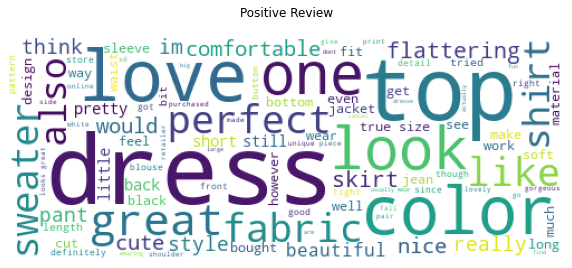

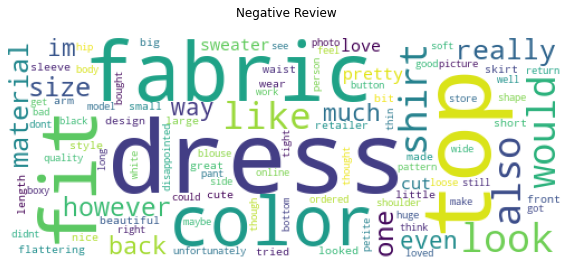

In [127]:
# b. generating word cloud for positive and negative review

import matplotlib.pyplot as plt

def gen_cloud(text, title):
    wordcloud=WordCloud(stopwords=stop_word, background_color='white',max_words=100,width=500,height=200).generate(''.join(text.tolist()))
    plt.figure(figsize=(10,8))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(title)
    plt.show()
    

gen_cloud(positive_review,'Positive Review\n')
gen_cloud(negative_review,'Negative Review\n')

In [128]:
df.head(2)

,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag,sentiment_score,Sentiment,Age Group,Rating_new
2,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0.073675,positive,51-60,0
3,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0.550000,positive,41-50,1


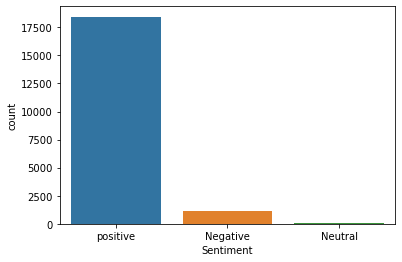

In [129]:
# c. Sentiment analysis

import string

sns.countplot(data=df,x='Sentiment')
plt.show()

In [130]:
# Sentiment analysis for different columns

def plot_sentiment(col_name):
    grouped=df.groupby([col_name,'Sentiment']).size().unstack().fillna(0)
    grouped.plot(kind='bar',stacked=True,figsize=(12,6))
    plt.title(f'Sentiment distribution as per {col_name}')
    plt.ylabel('Review Count')
    plt.show()


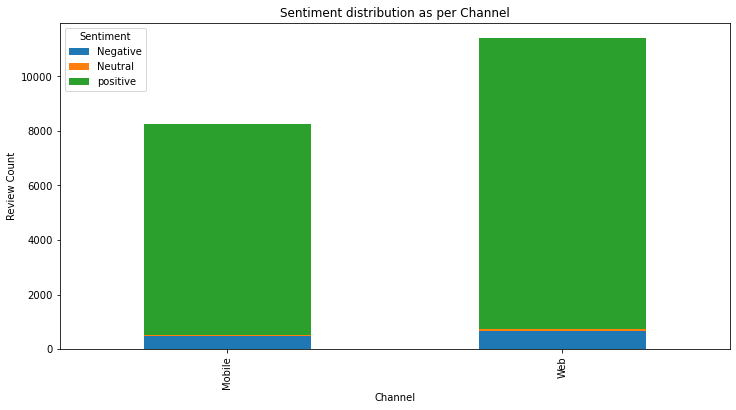

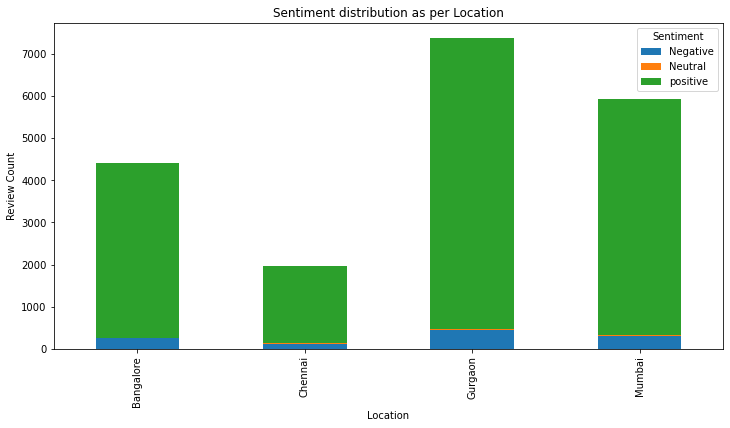

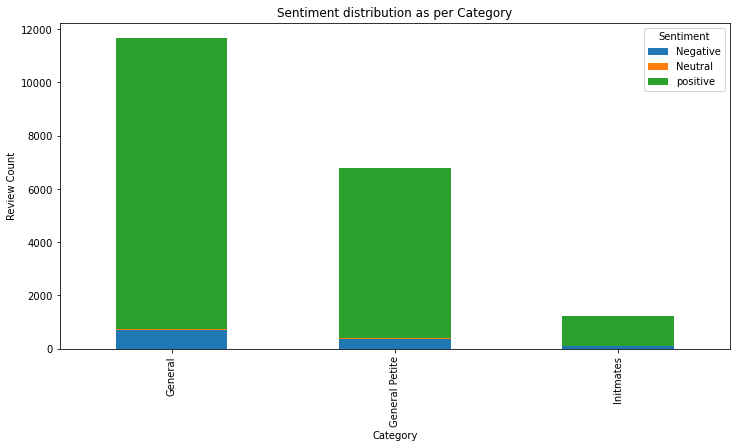

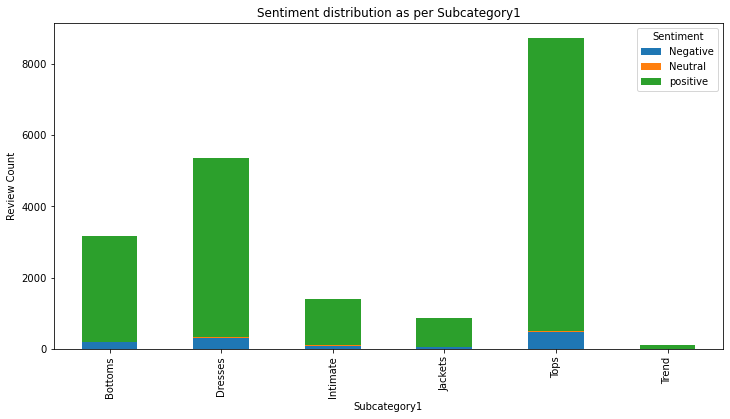

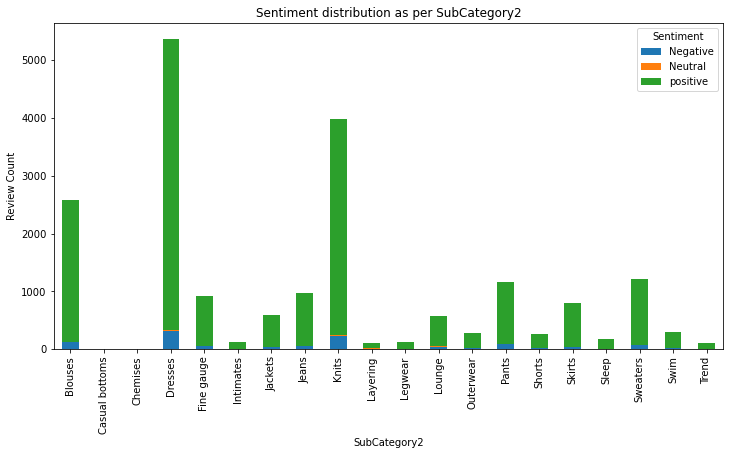

In [131]:
# plotting data 

plot_sentiment('Channel')
plot_sentiment('Location')
plot_sentiment('Category')
plot_sentiment('Subcategory1')
plot_sentiment('SubCategory2')

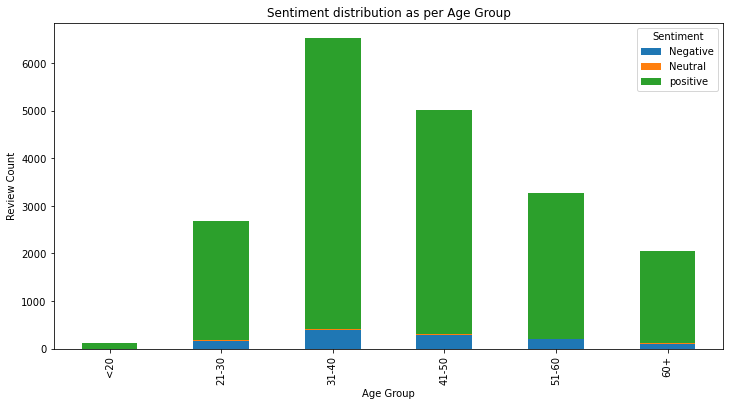

In [132]:
# Grouping Aging data

df['Age Group']=pd.cut(df['Customer Age'],bins=[0,20,30,40,50,60,100],labels=['<20','21-30','31-40','41-50','51-60','60+'])

plot_sentiment('Age Group')

### Topic Mining

In [133]:
count_vect=CountVectorizer(analyzer='word',token_pattern=r'\w{1,}', ngram_range=(1,1),min_df=1,max_features=800)
positive_review_count=count_vect.fit_transform(positive_review)
positive_review_dtm=pd.DataFrame(positive_review_count.todense(),columns=count_vect.get_feature_names())

C:\Users\Kshitiz\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [134]:
count_vect=CountVectorizer(analyzer='word',token_pattern=r'\w{1,}',ngram_range=(1,1),min_df=1,max_features=800)
negatuve_review_count=count_vect.fit_transform(negative_review)
negative_review_dtm=pd.DataFrame(negatuve_review_count.todense(),columns=count_vect.get_feature_names())

C:\Users\Kshitiz\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


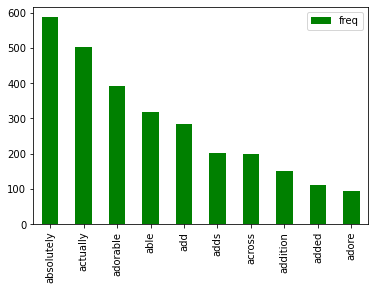

In [135]:
word_freq=pd.DataFrame(positive_review_dtm.apply(sum).head(10),columns=['freq'])
word_freq.sort_values('freq',ascending=False,inplace=True)
word_freq.plot(kind='bar',color='Green')
plt.show()

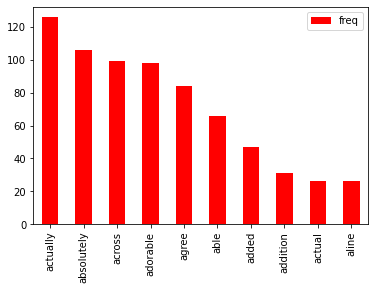

In [136]:
word_freq=pd.DataFrame(negative_review_dtm.apply(sum).head(10),columns=['freq'])
word_freq.sort_values('freq',ascending=False,inplace=True)
word_freq.plot(kind='bar',color='red')
plt.show()

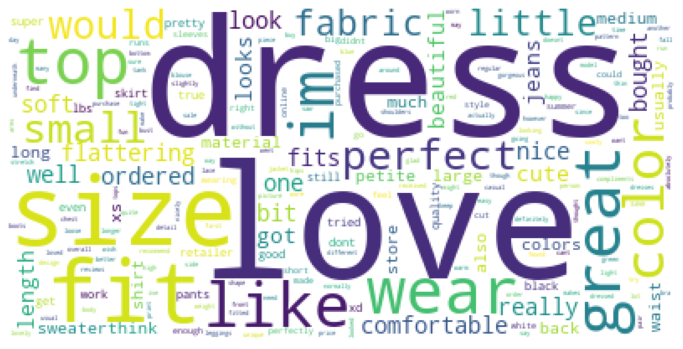

In [137]:
word_freq=dict(positive_review_dtm.apply(sum))

wordcloud=WordCloud(background_color='white',stopwords=stop_word)
wordcloud=wordcloud.generate_from_frequencies(word_freq)

fig=plt.figure(figsize=(12,12))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [138]:
word_freq

{'able': 319,
 'absolutely': 587,
 'across': 200,
 'actually': 502,
 'add': 285,
 'added': 111,
 'addition': 151,
 'adds': 201,
 'adorable': 391,
 'adore': 95,
 'afraid': 85,
 'ag': 90,
 'ago': 106,
 'agree': 232,
 'airy': 106,
 'aline': 88,
 'almost': 448,
 'along': 114,
 'already': 238,
 'also': 1584,
 'although': 292,
 'always': 456,
 'amazing': 385,
 'amount': 159,
 'ankle': 220,
 'another': 509,
 'anyone': 85,
 'anything': 286,
 'anyway': 133,
 'appears': 124,
 'appropriate': 146,
 'area': 380,
 'arent': 102,
 'arm': 220,
 'armholes': 124,
 'arms': 603,
 'around': 719,
 'arrived': 181,
 'athletic': 155,
 'available': 204,
 'away': 209,
 'awesome': 168,
 'b': 307,
 'baby': 130,
 'back': 1776,
 'bad': 134,
 'baggy': 170,
 'band': 99,
 'based': 187,
 'basic': 160,
 'bc': 83,
 'beach': 109,
 'beading': 89,
 'beautiful': 1926,
 'beautifully': 353,
 'believe': 93,
 'belly': 108,
 'belt': 316,
 'best': 379,
 'better': 789,
 'big': 1090,
 'bigger': 171,
 'bit': 2174,
 'black': 1332,
 'bla

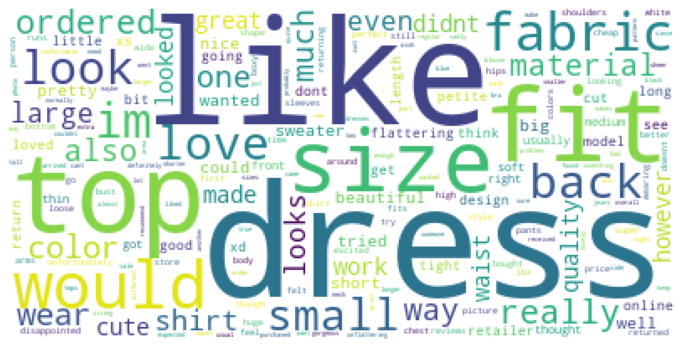

In [139]:
word_freq_neg=dict(negative_review_dtm.apply(sum))
wordcloud=WordCloud(background_color='white',stopwords=stop_word)
wordcloud=wordcloud.generate_from_frequencies(word_freq_neg)

fig=plt.figure(figsize=(12,12))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [140]:
word_freq_neg

{'able': 66,
 'absolutely': 106,
 'across': 99,
 'actual': 26,
 'actually': 126,
 'added': 47,
 'addition': 31,
 'adorable': 98,
 'agree': 84,
 'aline': 26,
 'almost': 154,
 'along': 43,
 'already': 99,
 'also': 733,
 'although': 93,
 'always': 63,
 'amazing': 40,
 'amount': 36,
 'another': 159,
 'anyone': 55,
 'anything': 79,
 'anyway': 33,
 'apart': 38,
 'appear': 34,
 'appears': 58,
 'appropriate': 28,
 'area': 198,
 'areas': 24,
 'arent': 25,
 'arm': 147,
 'armholes': 63,
 'arms': 336,
 'around': 299,
 'arrived': 139,
 'athletic': 43,
 'attached': 29,
 'attractive': 25,
 'available': 36,
 'average': 40,
 'away': 86,
 'awesome': 25,
 'awful': 64,
 'awkward': 86,
 'b': 86,
 'back': 1057,
 'bad': 209,
 'badly': 29,
 'bag': 59,
 'baggy': 86,
 'band': 43,
 'barely': 73,
 'based': 70,
 'basic': 27,
 'basically': 29,
 'bc': 38,
 'beautiful': 531,
 'behind': 25,
 'believe': 43,
 'belly': 32,
 'belt': 75,
 'best': 76,
 'better': 327,
 'big': 502,
 'bigger': 60,
 'billowy': 35,
 'bit': 406,


#### Similarity- Recommendation based on that

In [141]:
corr=negative_review_dtm.corrwith(negative_review_dtm.able)
corr.sort_values(ascending=False)

able      1.000000
need      0.089240
wear      0.080605
wears     0.071078
hole      0.059422
            ...   
feel     -0.026447
really   -0.026903
wide     -0.027093
nice     -0.028299
made     -0.031030
Length: 800, dtype: float64

In [142]:
negative_review_dtm.T[0]

able          0
absolutely    0
across        0
actual        0
actually      0
             ..
yes           0
yet           0
youre         0
zip           1
zipper        1
Name: 0, Length: 800, dtype: int64

In [143]:
corr_doc=negative_review_dtm.T.corrwith(negative_review_dtm.T[0]) #document similarity
corr_doc.sort_values(ascending=False)

0       1.000000
199     0.362447
550     0.359969
3924    0.359382
1928    0.350799
          ...   
1679   -0.040026
4457   -0.040389
2444   -0.041559
3585   -0.041719
3998   -0.042616
Length: 4515, dtype: float64

### Text Classification

In [151]:
df['Rating_new']=np.where(df.Rating>=4,1,0)

In [155]:
X=df['Review Text']
y=df['Recommend Flag']

In [156]:
# Splitting data into train and test
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=42)

In [158]:
train_X=train_X.apply(lambda x: clean_txt(x))
train_X=pre_process(train_X)

test_X=test_X.apply(lambda x: clean_txt(x))
test_X=pre_process(test_X)

In [159]:
test_X

18453    normally xs tanks ordered size looks pretty mu...
12422    ordered shirt last week wore soon arrived beau...
15117    love material thick cotton structured enough t...
9613     beautiful simple yet feminine top little tight...
7973     photo mila turtleneck model hands sides hair b...
                               ...                        
20776    versatile comfortable plan adding rotation yea...
21525    like color dress little thin fall neckline rou...
10456    beautiful well made jacket also cozy warm unfo...
53       soft comfortable shirt unusual asymmetrical se...
6777     ordered regular medium even though short never...
Name: Review Text, Length: 3933, dtype: object

In [160]:
# Classification - Predict recommendation

# Vectorizing text - TF-IDF

tdif=TfidfVectorizer(analyzer='word',token_pattern=r'\w{1,}',ngram_range=(1,1),min_df=5,lowercase=True,max_features=1000)
X_train_tfidf=tdif.fit_transform(train_X)
X_test_tfdif=tdif.fit_transform(test_X)

In [161]:
dtm_tfidf_train=pd.DataFrame(X_train_tfidf.toarray(),columns=tdif.get_feature_names())
dtm_tfidf_test=pd.DataFrame(X_test_tfdif.toarray(),columns=tdif.get_feature_names())

C:\Users\Kshitiz\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Kshitiz\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [162]:
from sklearn.svm import LinearSVC

svc_model=LinearSVC(C=1.0).fit(dtm_tfidf_train,train_y)

In [164]:
c_report=classification_report(train_y,svc_model.predict(dtm_tfidf_train))
print("Classification report for train data: \n", c_report)
c_test_report=classification_report(test_y,svc_model.predict(dtm_tfidf_test))
print("Classification report for test data: \n",c_test_report)

Classification report for train data: 
               precision    recall  f1-score   support

           0       0.80      0.67      0.73      2875
           1       0.93      0.96      0.95     12854

    accuracy                           0.91     15729
   macro avg       0.87      0.82      0.84     15729
weighted avg       0.91      0.91      0.91     15729

Classification report for test data: 
               precision    recall  f1-score   support

           0       0.21      0.12      0.16       700
           1       0.83      0.90      0.86      3233

    accuracy                           0.76      3933
   macro avg       0.52      0.51      0.51      3933
weighted avg       0.72      0.76      0.74      3933



In [165]:
# Classification - Predict recommendation

# Vectorizing text - TF-IDF

tdif=TfidfVectorizer(stop_words='english',max_features=5000)
X=tdif.fit_transform(df['Review Text'])
y=df['Recommend Flag']

In [166]:
# Splitting data into train and test

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [167]:
# Model creation- Logistic regression (Predicting Recommendation)

model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [168]:
# Model evaluation

# Predicting Recommendation

print('Classification report: \n', classification_report(y_test,y_pred))
print('Confusion metrix: \n', confusion_matrix(y_test,y_pred))

# predicting 89% accuracy (0/1)

Classification report: 
               precision    recall  f1-score   support

           0       0.80      0.54      0.64       700
           1       0.91      0.97      0.94      3233

    accuracy                           0.89      3933
   macro avg       0.85      0.75      0.79      3933
weighted avg       0.89      0.89      0.88      3933

Confusion metrix: 
 [[ 375  325]
 [  94 3139]]


In [169]:
# Predicting Rating (1-5) using Random forest

y_rat=df['Rating'].astype(int)
X_train,X_test,y_train_rat,y_test_rat=train_test_split(X,y_rat,test_size=0.2,random_state=42)


In [170]:
from sklearn.ensemble import RandomForestClassifier

rf_model=RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X_train,y_train_rat)
rf_pred=rf_model.predict(X_test)

In [171]:
print('Calssification Report: \n',classification_report(y_test_rat,rf_pred))

Calssification Report: 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       140
           2       0.22      0.01      0.03       297
           3       0.31      0.20      0.24       419
           4       0.33      0.06      0.10       837
           5       0.63      0.99      0.77      2240

    accuracy                           0.60      3933
   macro avg       0.30      0.25      0.23      3933
weighted avg       0.48      0.60      0.49      3933



In [172]:
# defining list of categorical columns
categorical_cols=['Category','Subcategory1','SubCategory2','Channel','Age Group']

In [173]:
for col in categorical_cols:
    df[col]=df[col].astype(str).fillna('Missing')

In [174]:
X_structured=pd.get_dummies(df[categorical_cols+['Rating']],drop_first=True)


In [175]:
# Feature Importance

feature_name=tdif.get_feature_names_out()

In [176]:
coeff=pd.Series(model.coef_[0],index=feature_name)
top_positive=coeff.sort_values(ascending=False).head(10)
top_negative=coeff.sort_values().head(10)

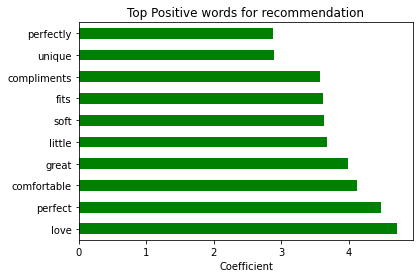

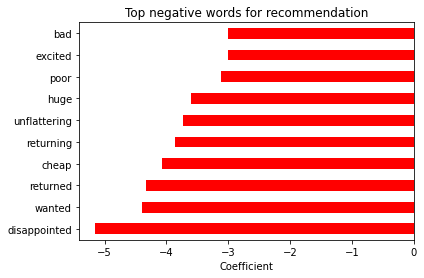

In [177]:
top_positive.plot(kind='barh',title='Top Positive words for recommendation',color='green')
plt.xlabel('Coefficient')
plt.show()
top_negative.plot(kind='barh',title='Top negative words for recommendation',color='red')
plt.xlabel('Coefficient')
plt.show()

In [178]:
# Document term matrix - CountVectorizer

count_vect=CountVectorizer(stop_words='english',max_df=0.95,min_df=5,max_features=1000)
doc_term=count_vect.fit_transform(df['Review Text'])

In [179]:
# Training LDA with 5 topics

lda_mod=LatentDirichletAllocation(n_components=5, random_state=42)
lda_mod.fit(doc_term)

LatentDirichletAllocation(n_components=5, random_state=42)

In [180]:
# top words of each topic

def disp_topics(model,feature,top_word):
    for topic_idx,topic in enumerate(model.components_):
        top_feature=[feature[i] for i in topic.argsort()[:-top_word -1:-1]]
        print(f"Topic #{topic_idx + 1}: {' | '.join(top_feature)}")

In [181]:
# Displaying top words for each topic

print('\nLDA Topics: \n')
disp_topics(lda_mod,count_vect.get_feature_names_out(),top_word=10)


LDA Topics: 

Topic #1: dress | size | wear | love | fit | small | fits | beautiful | perfect | great
Topic #2: love | sweater | wear | great | like | soft | fabric | flattering | dress | comfortable
Topic #3: shirt | color | like | white | love | fabric | just | cute | size | looks
Topic #4: size | like | fit | small | just | ordered | petite | look | waist | xs
Topic #5: great | jeans | love | pants | fit | wear | perfect | color | size | comfortable
